# Carga de datos

In [1]:
import pandas as pd

# Cargar el Excel (única hoja)
df_grado = pd.read_excel(r"C:\Users\0021878\Downloads\test_grado_completo_con_scoring.xlsx")

# Vista rápida de las primeras filas
df_grado

,target,desmatriculado,PL_CURSO_ACADEMICO,CH_NACIONAL,NU_NOTA_MEDIA_ADMISION,NU_NOTA_MEDIA_1_BACH__PC,CH_PRUEBAS_CALIFICADAS,NU_RESULTADO_ADMISION_PUNTOS,PL_RESOLUCION_DEFINITIVA,TITULACION,...,tiempo_etapa_dias,tiempo_entre_etapas_dias,num_asistencias_acum,num_solicitudes_acum,PCA1,PCA2,cluster,interpretacion_cluster,probabilidad_matricula,prediction_label
0,0,0,2025/2026,False,0.0,0.0,False,0.0,0,Doble Grado Relaciones Internacionales/ Derecho,...,1097,1097,0,0,-9.925818,34.478101,0,Perfil mixto / no dominante,0.0000,0
1,0,0,2025/2026,False,0.0,0.0,False,0.0,0,Doble Grado Relaciones Internacionales/ Derecho,...,93,93,0,0,-2.923296,2.295669,0,Perfil mixto / no dominante,0.0000,0
2,0,0,2025/2026,False,0.0,0.0,False,0.0,0,Doble Grado Relaciones Internacionales/ Derecho,...,0,0,0,0,-2.274656,-0.685373,0,Perfil mixto / no dominante,0.0014,0
3,0,0,2025/2026,True,0.0,0.0,False,0.0,Admitido,Máster en Big Data Science,...,91,91,0,0,-2.323181,1.899729,0,Perfil mixto / no dominante,0.0000,0
4,0,0,2025/2026,True,0.0,0.0,False,0.0,Admitido,Máster en Big Data Science,...,986,986,0,0,-8.565469,30.588251,0,Perfil mixto / no dominante,0.0700,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105960,0,0,2025/2026,True,0.0,7.0,False,0.0,Admitido,Grado en Ingeniería en Organización Industrial...,...,0,0,0,0,-0.832123,-0.771191,0,Perfil mixto / no dominante,0.0000,0
105961,0,0,2025/2026,True,0.0,7.0,False,0.0,Admitido,Grado en Ingeniería en Organización Industrial...,...,0,0,0,0,-0.832123,-0.771191,0,Perfil mixto / no dominante,0.0000,0
105962,1,0,2025/2026,True,0.0,10.0,False,0.0,Admitido,Alumno extraordinario (Facultad de CC.Económic...,...,0,0,0,0,-0.450835,-0.673128,0,Perfil mixto / no dominante,0.0984,0
105963,1,0,2025/2026,True,0.0,10.0,False,0.0,Admitido,Alumno extraordinario (Facultad de CC.Económic...,...,0,0,0,0,-0.450835,-0.673128,0,Perfil mixto / no dominante,0.0984,0


## Variable Visita Campus

### Revisar que la variable Visita Campus está en el conjunto de datos.

In [15]:
# Comprobar si la columna existe
if "CH_VISITACAMPUS__PC" in df_grado.columns:
    print("✅ La columna 'CH_VISITACAMPUS__PC' está en el dataset.")
else:
    print("❌ La columna 'CH_VISITACAMPUS__PC' NO está en el dataset.")

print(df_grado["CH_VISITACAMPUS__PC"])


✅ La columna 'CH_VISITACAMPUS__PC' está en el dataset.
0         False
1         False
2         False
3         False
4         False
          ...  
105960    False
105961    False
105962     True
105963     True
105964     True
Name: CH_VISITACAMPUS__PC, Length: 105965, dtype: bool


### Analizar % de true y de false que tiene.

In [8]:
# Calcular porcentaje de valores
porcentaje_visita = df_grado["CH_VISITACAMPUS__PC"].value_counts(normalize=True) * 100
print("Porcentajes de 'Visita Campus':\n", porcentaje_visita)


Porcentajes de 'Visita Campus':
 CH_VISITACAMPUS__PC
False    78.637286
True     21.362714
Name: proportion, dtype: float64


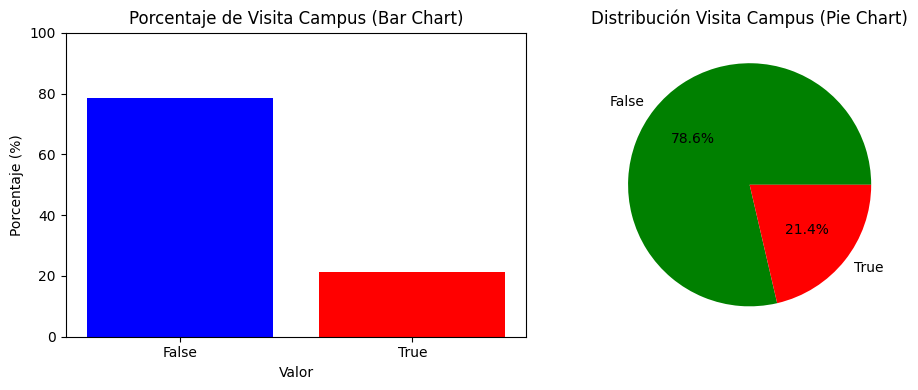

In [23]:
import matplotlib.pyplot as plt

# Calcular porcentajes
porcentaje_visita = df_grado["CH_VISITACAMPUS__PC"].value_counts(normalize=True) * 100

# Crear figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# --- Gráfico de barras ---
axes[0].bar(porcentaje_visita.index.astype(str), porcentaje_visita.values, color=['blue', 'red'])
axes[0].set_title("Porcentaje de Visita Campus (Bar Chart)")
axes[0].set_ylabel("Porcentaje (%)")
axes[0].set_xlabel("Valor")
axes[0].set_ylim(0, 100)

# --- Gráfico circular ---
axes[1].pie(porcentaje_visita.values, labels=porcentaje_visita.index.astype(str),
            autopct='%1.1f%%', colors=['green', 'red'])
axes[1].set_title("Distribución Visita Campus (Pie Chart)")

plt.tight_layout()
plt.show()


### Análisis de las probabilidades para los que visitan y los que no

                       count      mean       std  min  25%   50%   75%  max
CH_VISITACAMPUS__PC                                                        
False                83328.0  0.081340  0.123220  0.0  0.0  0.01  0.12  0.5
True                 22637.0  0.098534  0.130678  0.0  0.0  0.03  0.15  0.5


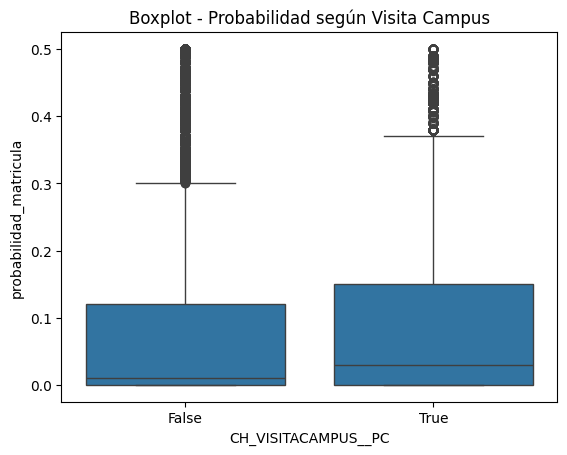

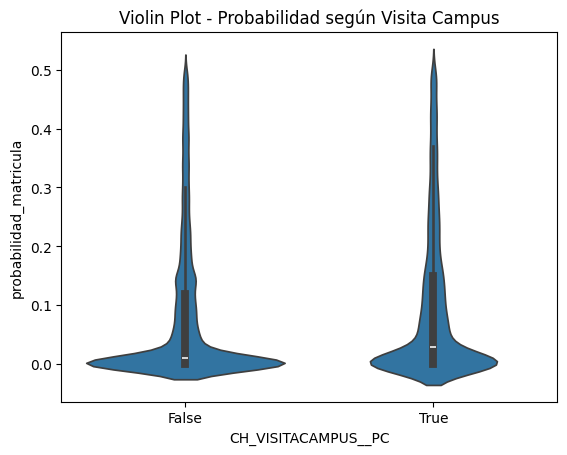

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estadísticas por grupo
stats_visita = df_grado.groupby("CH_VISITACAMPUS__PC")["probabilidad_matricula"].describe()
print(stats_visita)

# Boxplot
sns.boxplot(x="CH_VISITACAMPUS__PC", y="probabilidad_matricula", data=df_grado)
plt.title("Boxplot - Probabilidad según Visita Campus")
plt.show()

# Violin plot
sns.violinplot(x="CH_VISITACAMPUS__PC", y="probabilidad_matricula", data=df_grado)
plt.title("Violin Plot - Probabilidad según Visita Campus")
plt.show()


# Carga de datos

In [24]:
import pandas as pd

# Cargar el Excel (única hoja)
df_master = pd.read_excel(r"C:\Users\0021878\Downloads\test_master_completo_con_scoring 1.xlsx")

# Vista rápida de las primeras filas
df_master

,target,desmatriculado,PL_CURSO_ACADEMICO,CH_NACIONAL,NU_NOTA_MEDIA_ADMISION,NU_NOTA_MEDIA_1_BACH__PC,CH_PRUEBAS_CALIFICADAS,NU_RESULTADO_ADMISION_PUNTOS,PL_RESOLUCION_DEFINITIVA,TITULACION,...,tiempo_etapa_dias,tiempo_entre_etapas_dias,num_asistencias_acum,num_solicitudes_acum,PCA1,PCA2,cluster,interpretacion_cluster,probabilidad_matricula,prediction_label
0,1.0,0.0,2025/2026,1.0,0.0,0.0,0.0,0.0,Admitido,Doble Máster en Arquitectura con Estrategia y ...,...,645.0,645.0,0.0,0.0,-5.463977,18.799213,0.0,Perfil mixto / no dominante,NaN,NaN
1,1.0,0.0,2025/2026,1.0,0.0,0.0,0.0,0.0,Admitido,Doble Máster en Arquitectura con Estrategia y ...,...,8.0,8.0,0.0,0.0,-1.021142,-1.619322,0.0,Perfil mixto / no dominante,NaN,NaN
2,1.0,0.0,2025/2026,1.0,0.0,0.0,0.0,0.0,Admitido,Doble Máster en Arquitectura con Estrategia y ...,...,3.0,3.0,0.0,0.0,-0.986269,-1.779593,0.0,Perfil mixto / no dominante,NaN,NaN
3,1.0,0.0,2025/2026,1.0,0.0,0.0,0.0,0.0,Admitido,Doble Máster en Arquitectura con Estrategia y ...,...,0.0,0.0,0.0,0.0,-0.965345,-1.875756,0.0,Perfil mixto / no dominante,NaN,NaN
4,1.0,0.0,2025/2026,1.0,0.0,0.0,0.0,0.0,Admitido,Doble Máster en Arquitectura con Estrategia y ...,...,0.0,0.0,0.0,0.0,-0.965345,-1.875756,0.0,Perfil mixto / no dominante,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5897,1.0
7358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8034,0.0
7359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8034,0.0
7360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7325,0.0


### Variable antiguo alumno

In [26]:
for col in df_master.columns:
    print(col)


target
desmatriculado
PL_CURSO_ACADEMICO
CH_NACIONAL
NU_NOTA_MEDIA_ADMISION
NU_NOTA_MEDIA_1_BACH__PC
CH_PRUEBAS_CALIFICADAS
NU_RESULTADO_ADMISION_PUNTOS
PL_RESOLUCION_DEFINITIVA
TITULACION
CENTROENSENANZA
MINIMUMPAYMENTPAYED
PAID_AMOUNT
PAID_PERCENT
CH_PAGO_SUPERIOR
CH_MATRICULA_SUJETA_BECA
CH_AYUDA_FINANCIACION
CU_IMPORTE_TOTAL
CH_VISITACAMPUS__PC
CH_ENTREVISTA_PERSONAL__PC
ACC_DTT_FECHAULTIMAACTIVIDAD
NU_PREFERENCIA
STAGENAME
PL_SUBETAPA
CH_HIJO_EMPLEADO__PC
CH_HIJO_PROFESOR_ASOCIADO__PC
CH_HERMANOS_ESTUDIANDO_UNAV__P
CH_HIJO_MEDICO__PC
YEARPERSONBIRTHDATE
NAMEX
CH_FAMILIA_NUMEROSA__PC
PL_SITUACION_SOCIO_ECONOMICA
LEADSOURCE
PL_ORIGEN_DE_SOLICITUD
PL_PLAZO_ADMISION
RECORDTYPENAME
PLAZO_ADMISION_LIMPIO
FO_rentaFam_ges__c
CU_precioOrdinario_def__c
CU_precioAplicado_def__c
PORCENTAJE_PAGADO_FINAL
tiempo_etapa_dias
tiempo_entre_etapas_dias
num_asistencias_acum
num_solicitudes_acum
PCA1
PCA2
cluster
interpretacion_cluster
probabilidad_matricula
prediction_label


In [30]:
# Lista de palabras clave que quieres buscar
palabras_clave = ["antiguo", "alumno", "exalumno", "actual", "ANTIGUO", "ALUMNO", "EXALUMNO", "ACTUAL"]

# Convertimos todo a minúsculas para evitar problemas de mayúsculas/minúsculas
columnas_encontradas = [
    col for col in df_master.columns 
    if any(palabra.lower() in col.lower() for palabra in palabras_clave)
]

# Mostrar resultados
if columnas_encontradas:
    print("✅ Columnas encontradas que coinciden con las palabras clave:")
    for col in columnas_encontradas:
        print("-", col)
else:
    print("❌ No se encontraron columnas con esas palabras clave.")


❌ No se encontraron columnas con esas palabras clave.
